# Deep Learning with PyTorch: A 60 Minute Blitz
---

In [4]:
import torch


In [5]:
torch.__version__

'0.4.0'

# Getting Started

## Tensors

In [3]:
x = torch.empty(5,4)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  4.5835e-41],
        [-9.7019e-34,  4.5835e-41, -1.8586e-29,  4.5835e-41],
        [ 1.4013e-45,  1.4153e-43,  0.0000e+00,  0.0000e+00],
        [ 4.5690e+10,  4.5835e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [4]:
x = torch.rand(5,4)
x

tensor([[ 0.3351,  0.6205,  0.3876,  0.8801],
        [ 0.1087,  0.9557,  0.6853,  0.1644],
        [ 0.7972,  0.3913,  0.0791,  0.5272],
        [ 0.6227,  0.1441,  0.8804,  0.5330],
        [ 0.2648,  0.0872,  0.7622,  0.5287]])

In [5]:
x = torch.zeros(5, 7, dtype=torch.long)
print(x)

tensor([[ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0]])


In [6]:
x = torch.tensor([5, 4], dtype=torch.int)
x

tensor([ 5,  4], dtype=torch.int32)

In [7]:
x = x.new_ones(5,1)
x

tensor([[ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1]], dtype=torch.int32)

In [8]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[-0.4523],
        [-2.1797],
        [ 0.5461],
        [-1.3227],
        [ 1.7743]])

In [9]:
x.size()

torch.Size([5, 1])

## Operations

In [10]:
x = torch.zeros(3,2)
y = torch.ones(3,2)
x+y

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])

In [11]:
torch.add(x,y)

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])

In [12]:
z = torch.empty(3,2)
torch.add(x,y, out=z)
z

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])

In [13]:
y.add_(x)
y

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])

In [14]:
y.t_()

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [15]:
y = torch.randn(3,2)
y

tensor([[-1.1723, -0.6097],
        [ 0.6745,  0.1876],
        [ 0.0224, -0.2052]])

In [16]:
y[:,1], y[1,:]

(tensor([-0.6097,  0.1876, -0.2052]), tensor([ 0.6745,  0.1876]))

In [17]:
x = torch.randn(5,6)
y = x.view(30)
z = x.view(-1, 2)
x.shape, y.shape, z.shape

(torch.Size([5, 6]), torch.Size([30]), torch.Size([15, 2]))

In [18]:
x = torch.randn(1)
x.item()

-0.1289324164390564

More operations at: [http://pytorch.org/docs/torch]

## NumPy Bridge

In [19]:
a = torch.ones(5)
a

tensor([ 1.,  1.,  1.,  1.,  1.])

In [20]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [21]:
a.add_(1)
a, b

(tensor([ 2.,  2.,  2.,  2.,  2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [22]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
a,b

(array([1., 1., 1., 1., 1.]),
 tensor([ 1.,  1.,  1.,  1.,  1.], dtype=torch.float64))

In [23]:
np.add(a, 1, out=a)
a, b

(array([2., 2., 2., 2., 2.]),
 tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64))

In [24]:
a = a + 1
a, b

(array([3., 3., 3., 3., 3.]),
 tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64))

## CUDA Tensors

In [25]:
torch.cuda.is_available()

True

In [26]:
dev = torch.device("cuda")
x = torch.ones(2,3, device=dev)
x

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], device='cuda:0')

In [27]:
y = torch.rand(2,3)
y = y.to(dev)
y

tensor([[ 0.8153,  0.1598,  0.8328],
        [ 0.9325,  0.3546,  0.9069]], device='cuda:0')

In [28]:
z = x+y
z

tensor([[ 1.8153,  1.1598,  1.8328],
        [ 1.9325,  1.3546,  1.9069]], device='cuda:0')

In [29]:
z = z.to("cpu", dtype=torch.int)
z

tensor([[ 1,  1,  1],
        [ 1,  1,  1]], dtype=torch.int32)

# Autograd: Automatic Differentiation

## Tensor

In [30]:
a = torch.tensor([1,2,3], requires_grad=True, dtype=torch.float)
a

tensor([ 1.,  2.,  3.])

In [31]:
b = a * 3
b

tensor([ 3.,  6.,  9.])

In [32]:
c = b + 10
c

tensor([ 13.,  16.,  19.])

In [33]:
b.grad_fn, c.grad_fn

(<MulBackward0 at 0x7fc52ea90d68>, <AddBackward0 at 0x7fc52ea90518>)

In [34]:
out = c.sum()
out

tensor(48.)

In [35]:
out.grad_fn, out.requires_grad

(<SumBackward0 at 0x7fc52ea906a0>, True)

## Gradient

```
d(out)/dx = (d(out)/dz) * (dz/dy) * (dy/dx)
```

In [166]:
a = torch.tensor([1,1,1], dtype=torch.float, requires_grad=True)
b = torch.tensor([2,2,2], dtype=torch.float, requires_grad=True)

In [167]:
a, b

(tensor([ 1.,  1.,  1.]), tensor([ 2.,  2.,  2.]))

In [168]:
c = a*a + b

In [174]:
d = c.mean()
d

tensor(3.)

In [170]:
d.backward(torch.tensor([1.]))

In [171]:
a.grad, b.grad, c.grad

(tensor([ 0.6667,  0.6667,  0.6667]),
 tensor([ 0.3333,  0.3333,  0.3333]),
 None)

In [189]:
x = torch.ones([2,2], requires_grad=True)
x

tensor([[ 1.,  1.],
        [ 1.,  1.]])

In [190]:
y = x + 2
y

tensor([[ 3.,  3.],
        [ 3.,  3.]])

In [191]:
z = y*y * 3
z

tensor([[ 27.,  27.],
        [ 27.,  27.]])

In [192]:
out = z.sum()
out

tensor(108.)

In [193]:
out.backward()

In [194]:
out.grad, z.grad, y.grad, x.grad

(None, None, None, tensor([[ 18.,  18.],
         [ 18.,  18.]]))

## Dynamic gradient

In [222]:
x = torch.ones(3, requires_grad=True)
x

tensor([ 1.,  1.,  1.])

In [223]:
y = x*2
while y.sum() < 20:
    print(y)
    y = y*2
y

tensor([ 2.,  2.,  2.])
tensor([ 4.,  4.,  4.])


tensor([ 8.,  8.,  8.])

In [224]:
y.backward(torch.tensor([1,1,1]))

In [226]:
y.grad, x.grad

(None, tensor([ 8,  8,  8]))

More at: [https://pytorch.org/docs/stable/autograd.html]

# Neural Networks


## Build Model

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [349]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input channel, 6 output channel
        # --- Kernel ---
        # 5x5 square convolutions
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5))
        # --- Affine Transformation: y = xW + b ---
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        # --- CNN ---
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=(2,2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=(2,2))
        # --- FCC ---
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        # all dimensions except batch dimension
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    

In [444]:
md = Net()
md

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [445]:
params = list(md.parameters())
len(params), params[0].shape, params[9]

(10, torch.Size([6, 1, 5, 5]), Parameter containing:
 tensor([-0.0496, -0.0679, -0.0337, -0.0298,  0.0266, -0.1059,  0.0052,
          0.0214, -0.0103,  0.0910]))

**nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width**

In [446]:
x1 = torch.rand(1,1,32,32)
x1

tensor([[[[ 0.8648,  0.1729,  0.5483,  ...,  0.8479,  0.8551,  0.0517],
          [ 0.5965,  0.3573,  0.2598,  ...,  0.9482,  0.9765,  0.4324],
          [ 0.2736,  0.2738,  0.7650,  ...,  0.5044,  0.1387,  0.2234],
          ...,
          [ 0.7970,  0.6675,  0.4191,  ...,  0.2922,  0.1265,  0.2901],
          [ 0.6738,  0.5454,  0.9044,  ...,  0.6530,  0.7048,  0.9050],
          [ 0.6256,  0.6318,  0.1382,  ...,  0.9529,  0.1643,  0.8534]]]])

In [447]:
y_pred = md(x1)
y_pred

tensor([[-0.0395, -0.0475, -0.0354, -0.0133,  0.0618, -0.1062, -0.0067,
         -0.0175, -0.0040,  0.0892]])

## Loss

In [448]:
y.shape

torch.Size([1, 10])

In [449]:
y_true = torch.arange(1, 11)
y_true = y_true.view(1, -1)
y_true.shape

torch.Size([1, 10])

In [450]:
criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)
loss

tensor(38.4934)

In [451]:
loss.grad_fn

In [452]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions)
print(loss.grad_fn.next_functions[0][0].next_functions)
print(loss.grad_fn.next_functions[0][0].next_functions[1][0].next_functions)

((<AddmmBackward object at 0x7fc52d0b74a8>, 0),)
((<ExpandBackward object at 0x7fc52d0b7550>, 0), (<ReluBackward object at 0x7fc52d0b75c0>, 0), (<TBackward object at 0x7fc52d0b75f8>, 0))
((<AddmmBackward object at 0x7fc52d0b75c0>, 0),)


## Backprop

In [453]:
md.zero_grad()

In [454]:
md.conv1.weight.grad, md.conv1.bias.grad

(None, None)

In [455]:
loss.backward()

In [456]:
md.conv1.bias.grad

tensor([ 0.0090, -0.0549, -0.1108,  0.1223,  0.0082, -0.0709])

In [457]:
md.conv1.bias.data

tensor([ 0.1931, -0.1303, -0.1468, -0.1939,  0.0596,  0.0164])

**More Network Modules: [https://pytorch.org/docs/stable/nn.html]**

## Update Weights

In [458]:
lr = 0.01
for f in md.parameters():
    f.data = f.data - lr * f.grad.data

In [459]:
md.conv1.bias.data

tensor([ 0.1930, -0.1297, -0.1457, -0.1951,  0.0595,  0.0172])

In [460]:
-0.1178 + 0.0015*0.01

-0.117785

In [6]:
import torch.optim as optim


In [462]:
optimizer = optim.SGD(md.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [463]:
for i in range(10):
    y_pred = md(x1)
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()
    print(md.conv1.bias.data)

tensor([ 0.1933, -0.1284, -0.1433, -0.1972,  0.0596,  0.0186])
tensor([ 0.1951, -0.1259, -0.1395, -0.1992,  0.0602,  0.0216])
tensor([ 0.2003, -0.1215, -0.1322, -0.2011,  0.0627,  0.0282])
tensor([ 0.2139, -0.1134, -0.1169, -0.2021,  0.0706,  0.0432])
tensor([ 0.2559, -0.0970, -0.0769, -0.2014,  0.0961,  0.0844])
tensor([ 0.3011, -0.0799, -0.0343, -0.2006,  0.1236,  0.1283])
tensor([-2.1458, -0.5695, -2.0483, -0.3465, -1.3616, -1.9554])
tensor([-4.5928, -1.0590, -4.0623, -0.4925, -2.8469, -4.0391])
tensor([-7.0397, -1.5485, -6.0763, -0.6385, -4.3321, -6.1228])
tensor([-9.4866, -2.0380, -8.0903, -0.7845, -5.8174, -8.2065])


# Training a Classifier

## Loading & Normalizaing CIFAR10

In [7]:
import torchvision
import torchvision.transforms as transforms

--- TODO ---  
Normalize with mean 0 and std 1

In [8]:
trnsfrm = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))])


In [9]:
trnset = torchvision.datasets.CIFAR10(root="./data", train=True, transform=trnsfrm, download=True)
trnldr = torch.utils.data.DataLoader(dataset=trnset, batch_size=4, shuffle=True, num_workers=4)

Files already downloaded and verified


In [10]:
testset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=trnsfrm, download=True)
testldr = torch.utils.data.DataLoader(dataset=testset, batch_size=4, shuffle=True, num_workers=4)

Files already downloaded and verified


In [11]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Data Exploration

In [12]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [13]:
smpl = iter(trnldr)
imgs, labels = next(smpl)


In [14]:
imgs.shape, labels.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [15]:
def imshow(img):
    img = img/2 + 0.5
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))

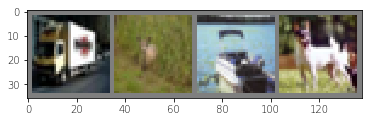

In [16]:
imshow(torchvision.utils.make_grid(imgs))

## Build CNN

In [17]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # --- Kernel ---
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        # --- FCC ---
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
md = CNN()

## Training

In [19]:
epochs = 2
lr = 0.001
m = 0.9
intrvl = 2000

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(md.parameters(), lr=lr, momentum=m)

In [21]:
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trnldr, 0):
        # get input
        inputs, labels = data
        
        # zero the gradients
        optimizer.zero_grad()
        
        # training step
        outputs = md(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print status
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("Epoch:{} Iteration:{} Loss:{}".format(epoch, i, running_loss/intrvl))
            running_loss = 0.0

print("Training Complete!")

Epoch:0 Iteration:1999 Loss:2.228038570046425
Epoch:0 Iteration:3999 Loss:1.894750807851553
Epoch:0 Iteration:5999 Loss:1.6732989878952502
Epoch:0 Iteration:7999 Loss:1.565858641549945
Epoch:0 Iteration:9999 Loss:1.5250832606628537
Epoch:0 Iteration:11999 Loss:1.4591481544449925
Epoch:1 Iteration:1999 Loss:1.393994118154049
Epoch:1 Iteration:3999 Loss:1.3773583032637835
Epoch:1 Iteration:5999 Loss:1.3524968849048018
Epoch:1 Iteration:7999 Loss:1.3120768364071846
Epoch:1 Iteration:9999 Loss:1.2891160056814552
Epoch:1 Iteration:11999 Loss:1.293164505816996
Training Complete!


## Testing

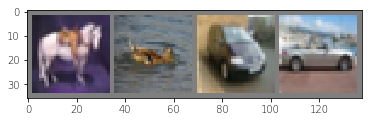

In [22]:
smpl = iter(testldr)
imgs, labels = next(smpl)
imshow(torchvision.utils.make_grid(imgs))

In [23]:
[classes[i] for i in labels.numpy()]

['horse', 'bird', 'car', 'car']

In [24]:
outputs = md(imgs)
outputs = outputs.detach().numpy()
[classes[np.argmax(i)] for i in outputs]

['horse', 'ship', 'car', 'plane']

In [39]:
with torch.no_grad():
    y_true = np.array([])
    y_pred = np.array([])
    for data in testldr:
        imgs, labels = data
        y_true = np.append(y_true, labels.numpy())
        outputs = md(imgs)
        _, pred = torch.max(outputs, 1)
        y_pred = np.append(y_pred, pred.numpy())
        

In [41]:
y_true.shape, y_pred.shape

((10000,), (10000,))

In [42]:
y_true[:5], y_pred[:5]

(array([8., 9., 9., 4., 8.]), array([8., 9., 9., 9., 3.]))

In [47]:
acc = (y_true == y_pred).mean()
acc

0.561

## Training on GPU

In [50]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
md = md.to(device)

In [51]:
epochs = 2
lr = 0.001
m = 0.9
intrvl = 2000

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(md.parameters(), lr=lr, momentum=m)

In [53]:
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trnldr, 0):
        # send input to gpu
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the gradients
        optimizer.zero_grad()
        
        # training step
        outputs = md(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print status
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("Epoch:{} Iteration:{} Loss:{}".format(epoch, i, running_loss/intrvl))
            running_loss = 0.0

print("Training Complete!")

Epoch:0 Iteration:1999 Loss:1.2099936809688807
Epoch:0 Iteration:3999 Loss:1.2139885279685259
Epoch:0 Iteration:5999 Loss:1.2062833626568317
Epoch:0 Iteration:7999 Loss:1.2033072304725647
Epoch:0 Iteration:9999 Loss:1.1818215675503017
Epoch:0 Iteration:11999 Loss:1.1807507127821446
Epoch:1 Iteration:1999 Loss:1.1087059390246867
Epoch:1 Iteration:3999 Loss:1.1152383999377489
Epoch:1 Iteration:5999 Loss:1.1117257242947818
Epoch:1 Iteration:7999 Loss:1.1121124037504195
Epoch:1 Iteration:9999 Loss:1.082045434758067
Epoch:1 Iteration:11999 Loss:1.1056893708258868
Training Complete!


## Testing

In [60]:
with torch.no_grad():
    y_true = np.array([])
    y_pred = np.array([])
    for data in testldr:
        imgs, labels = data
        imgs, labels = imgs.to(device), labels.to(device)
        y_true = np.append(y_true, labels.cpu().numpy())
        outputs = md(imgs)
        _, pred = torch.max(outputs, 1)
        y_pred = np.append(y_pred, pred.cpu().numpy())
        

In [61]:
y_true.shape, y_pred.shape

((10000,), (10000,))

In [62]:
y_true[:5], y_pred[:5]

(array([6., 9., 6., 7., 7.]), array([6., 8., 4., 7., 7.]))

In [63]:
acc = (y_true == y_pred).mean()
acc

0.6035